In [171]:
# Import the libraries
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="energy_data",
    user="postgres",
    password="aoufnihed"
)

In [173]:
# Define the SQL query for energy_production_sources
query = "SELECT * FROM energy_production_sources;"

In [174]:
# Read data into a pandas DataFrame
df_energy_production_sources = pd.read_sql_query(query, conn)

C:\Users\hey\AppData\Local\Temp\ipykernel_20984\1586502690.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_energy_production_sources = pd.read_sql_query(query, conn)


In [175]:
# Close the connection
conn.close()

In [176]:
df_energy_production_sources.head()

,datetime,heures,fioultac,fioulcogen,fioulautres,gaztac,gazcogen,gazccg,gazautres,hydrauliquefil,hydrauliquelacs,hydrauliquestepturbinage,bioenergiesdechets,bioenergiesbiomasse,bioenergiesbiogaz,stockagbatterie,destockagebatterie,eolienterrestre,eolienoffshore
0,2022-01-01,00:00:00,0.0,85.0,16.0,26.0,2152.0,621.0,162.0,6300.0,1439.0,980.0,554.0,349.0,345.0,0.0,0.0,0.0,0.0
1,2022-01-01,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,00:30:00,0.0,92.0,17.0,86.0,985.0,106.0,1514.0,6047.0,2494.0,1672.0,551.0,359.0,336.0,0.0,0.0,0.0,0.0
3,2022-01-01,00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,01:00:00,0.0,92.0,17.0,89.0,987.0,108.0,1508.0,5998.0,2388.0,632.0,557.0,356.0,339.0,0.0,0.0,0.0,0.0


In [177]:
df_energy_production_sources.tail()

,datetime,heures,fioultac,fioulcogen,fioulautres,gaztac,gazcogen,gazccg,gazautres,hydrauliquefil,hydrauliquelacs,hydrauliquestepturbinage,bioenergiesdechets,bioenergiesbiomasse,bioenergiesbiogaz,stockagbatterie,destockagebatterie,eolienterrestre,eolienoffshore
35035,2022-12-31,22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,2022-12-31,23:00:00,0.0,68.0,18.0,73.0,821.0,260.0,1361.0,5244.0,1425.0,367.0,522.0,429.0,335.0,0.0,0.0,0.0,0.0
35037,2022-12-31,23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,2022-12-31,23:30:00,0.0,67.0,18.0,73.0,819.0,232.0,1350.0,5204.0,1140.0,307.0,527.0,430.0,334.0,0.0,0.0,0.0,0.0
35039,2022-12-31,23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_energy_production_sources.describe()

,datetime,fioultac,fioulcogen,fioulautres,gaztac,gazcogen,gazccg,gazautres,hydrauliquefil,hydrauliquelacs,hydrauliquestepturbinage,bioenergiesdechets,bioenergiesbiomasse,bioenergiesbiogaz,stockagbatterie,destockagebatterie,eolienterrestre,eolienoffshore
count,35040,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.0,17520.0,17520.0,17520.0
mean,2022-07-02 00:00:00,41.306849,81.216553,11.807363,107.725799,805.857249,3144.331050,960.067352,3733.709018,1188.963014,686.879966,503.958961,361.781564,338.653938,0.0,0.0,0.0,0.0
min,2022-01-01 00:00:00,0.000000,48.000000,3.000000,0.000000,251.000000,0.000000,76.000000,1209.000000,49.000000,2.000000,375.000000,244.000000,266.000000,0.0,0.0,0.0,0.0
25%,2022-04-02 00:00:00,0.000000,67.000000,3.000000,36.000000,456.000000,2367.000000,474.000000,2656.000000,556.000000,82.000000,476.000000,313.000000,331.000000,0.0,0.0,0.0,0.0
50%,2022-07-02 00:00:00,0.000000,82.000000,4.000000,69.000000,643.000000,3404.000000,706.000000,3649.000000,924.500000,398.500000,506.000000,345.000000,339.000000,0.0,0.0,0.0,0.0
75%,2022-10-01 00:00:00,0.000000,94.000000,20.000000,126.000000,1117.000000,4218.250000,1468.000000,4742.000000,1519.000000,1054.000000,533.000000,423.000000,346.000000,0.0,0.0,0.0,0.0
max,2022-12-31 00:00:00,1286.000000,116.000000,354.000000,790.000000,2152.000000,5770.000000,2530.000000,7224.000000,6900.000000,4293.000000,615.000000,516.000000,370.000000,0.0,0.0,0.0,0.0
std,NaN,159.560333,15.230010,14.049115,122.311552,422.615738,1428.748075,634.608254,1295.424772,954.162371,780.493942,39.824529,59.770958,11.479132,0.0,0.0,0.0,0.0


In [179]:
df_energy_production_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  35040 non-null  datetime64[ns]
 1   heures                    35040 non-null  object        
 2   fioultac                  17520 non-null  float64       
 3   fioulcogen                17520 non-null  float64       
 4   fioulautres               17520 non-null  float64       
 5   gaztac                    17520 non-null  float64       
 6   gazcogen                  17520 non-null  float64       
 7   gazccg                    17520 non-null  float64       
 8   gazautres                 17520 non-null  float64       
 9   hydrauliquefil            17520 non-null  float64       
 10  hydrauliquelacs           17520 non-null  float64       
 11  hydrauliquestepturbinage  17520 non-null  float64       
 12  bioenergiesdechets

In [180]:
df_energy_production_sources.isnull().sum()

datetime                        0
heures                          0
fioultac                    17520
fioulcogen                  17520
fioulautres                 17520
gaztac                      17520
gazcogen                    17520
gazccg                      17520
gazautres                   17520
hydrauliquefil              17520
hydrauliquelacs             17520
hydrauliquestepturbinage    17520
bioenergiesdechets          17520
bioenergiesbiomasse         17520
bioenergiesbiogaz           17520
stockagbatterie             17520
destockagebatterie          17520
eolienterrestre             17520
eolienoffshore              17520
dtype: int64

In [181]:
df_energy_production_sources.duplicated().sum()

0

In [182]:
df_energy_production_sources.dropna(inplace=True)

In [183]:
df_energy_production_sources.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 0 to 35038
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  17520 non-null  datetime64[ns]
 1   heures                    17520 non-null  object        
 2   fioultac                  17520 non-null  float64       
 3   fioulcogen                17520 non-null  float64       
 4   fioulautres               17520 non-null  float64       
 5   gaztac                    17520 non-null  float64       
 6   gazcogen                  17520 non-null  float64       
 7   gazccg                    17520 non-null  float64       
 8   gazautres                 17520 non-null  float64       
 9   hydrauliquefil            17520 non-null  float64       
 10  hydrauliquelacs           17520 non-null  float64       
 11  hydrauliquestepturbinage  17520 non-null  float64       
 12  bioenergiesdechets     

## Regroup datetime into seasons and periods of the day

In [184]:
# Assuming your DataFrame is named df
df_energy_production_sources['datetime'] = pd.to_datetime(df_energy_production_sources['datetime'])

# Define seasons
def get_season(date):
    year = date.year
    seasons = {
        'spring': pd.date_range(start=f'{year}-03-21', end=f'{year}-06-20'),
        'summer': pd.date_range(start=f'{year}-06-21', end=f'{year}-09-22'),
        'autumn': pd.date_range(start=f'{year}-09-23', end=f'{year}-12-20'),
        'winter': pd.date_range(start=f'{year}-12-21', end=f'{year+1}-03-20')
    }
    for season, date_range in seasons.items():
        if date in date_range:
            return season
    return 'winter'  # Dates in January, February, and March will fall here by default

df_energy_production_sources['season'] =df_energy_production_sources['datetime'].apply(get_season)

In [185]:
# Define periods of the day
def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [186]:
df_energy_production_sources['heure'] = pd.to_datetime(df_energy_production_sources['heures'], format='%H:%M:%S').dt.hour
df_energy_production_sources['period_of_day'] = df_energy_production_sources['heure'].apply(get_period_of_day)

# Drop the 'heures' and 'heure' columns as they are no longer needed
df_energy_production_sources.drop(columns=['heures', 'heure'], inplace=True)



In [187]:
# Check
df_energy_production_sources.head()

,datetime,fioultac,fioulcogen,fioulautres,gaztac,gazcogen,gazccg,gazautres,hydrauliquefil,hydrauliquelacs,hydrauliquestepturbinage,bioenergiesdechets,bioenergiesbiomasse,bioenergiesbiogaz,stockagbatterie,destockagebatterie,eolienterrestre,eolienoffshore,season,period_of_day
0,2022-01-01,0.0,85.0,16.0,26.0,2152.0,621.0,162.0,6300.0,1439.0,980.0,554.0,349.0,345.0,0.0,0.0,0.0,0.0,winter,night
2,2022-01-01,0.0,92.0,17.0,86.0,985.0,106.0,1514.0,6047.0,2494.0,1672.0,551.0,359.0,336.0,0.0,0.0,0.0,0.0,winter,night
4,2022-01-01,0.0,92.0,17.0,89.0,987.0,108.0,1508.0,5998.0,2388.0,632.0,557.0,356.0,339.0,0.0,0.0,0.0,0.0,winter,night
6,2022-01-01,0.0,92.0,17.0,89.0,993.0,108.0,1504.0,5951.0,2080.0,1167.0,563.0,349.0,345.0,0.0,0.0,0.0,0.0,winter,night
8,2022-01-01,0.0,92.0,17.0,90.0,994.0,109.0,1486.0,5901.0,2095.0,1071.0,564.0,345.0,335.0,0.0,0.0,0.0,0.0,winter,night


In [188]:
# Aggregate the data by season and period of day
aggregated_df = df_energy_production_sources.groupby(['season', 'period_of_day']).mean().reset_index()

# Check the aggregated DataFrame
print(aggregated_df.head())

   season period_of_day            datetime   fioultac  fioulcogen  \
0  autumn     afternoon 2022-11-06 00:00:00  44.048315   66.996629   
1  autumn       evening 2022-11-06 00:00:00  73.285112   67.030899   
2  autumn       morning 2022-11-06 00:00:00  52.465490   66.896469   
3  autumn         night 2022-11-06 00:00:00  25.547051   66.757022   
4  spring     afternoon 2022-05-05 12:00:00  19.271739   85.609783   

   fioulautres      gaztac     gazcogen       gazccg    gazautres  \
0    13.552809  199.384270  1007.973034  4064.707865  1122.751685   
1    15.089888  229.251404  1020.845506  4383.407303  1131.345506   
2    14.626003  165.866774   998.198234  3832.077849  1095.379615   
3    12.823034  126.113764   968.528792  3368.386236  1077.504213   
4     7.246739   44.877174   520.490217  2564.725000   594.060870   

   hydrauliquefil  hydrauliquelacs  hydrauliquestepturbinage  \
0     3345.770787      1019.432584                705.580899   
1     3859.483146      1624.436798  

## Production energy over periode of day and season

In [99]:
''' 
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a function to plot the data
def plot_aggregated_data(aggregated_df, value_column, title):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y=value_column, hue='period_of_day', data=aggregated_df)
    plt.title(title)
    plt.ylabel('Mean Value')
    plt.xlabel('Season')
    plt.legend(title='Period of Day')
    plt.show()

# Plot each relevant column
columns_to_exclude = ['	datetime','season', 'period_of_day', 'stockagbatterie', 'destockagebatterie', 'eolienterrestre', 'eolienoffshore']
for column in aggregated_df.columns:
    if column not in columns_to_exclude:
        plot_aggregated_data(aggregated_df, column, f'Mean {column} by Season and Period of Day') '''


' \n# Set the aesthetics for the plots\nsns.set(style="whitegrid")\n\n# Create a function to plot the data\ndef plot_aggregated_data(aggregated_df, value_column, title):\n    plt.figure(figsize=(14, 8))\n    sns.barplot(x=\'season\', y=value_column, hue=\'period_of_day\', data=aggregated_df)\n    plt.title(title)\n    plt.ylabel(\'Mean Value\')\n    plt.xlabel(\'Season\')\n    plt.legend(title=\'Period of Day\')\n    plt.show()\n\n# Plot each relevant column\ncolumns_to_exclude = [\'\tdatetime\',\'season\', \'period_of_day\', \'stockagbatterie\', \'destockagebatterie\', \'eolienterrestre\', \'eolienoffshore\']\nfor column in aggregated_df.columns:\n    if column not in columns_to_exclude:\n        plot_aggregated_data(aggregated_df, column, f\'Mean {column} by Season and Period of Day\') '

## production electrical energy 

# 1. fioual:

## time series analytics

   season period_of_day   fioultac  fioulcogen  fioulautres
0  autumn     afternoon  44.048315   66.996629    13.552809
1  autumn       evening  73.285112   67.030899    15.089888
2  autumn       morning  52.465490   66.896469    14.626003
3  autumn         night  25.547051   66.757022    12.823034
4  spring     afternoon  19.271739   85.609783     7.246739


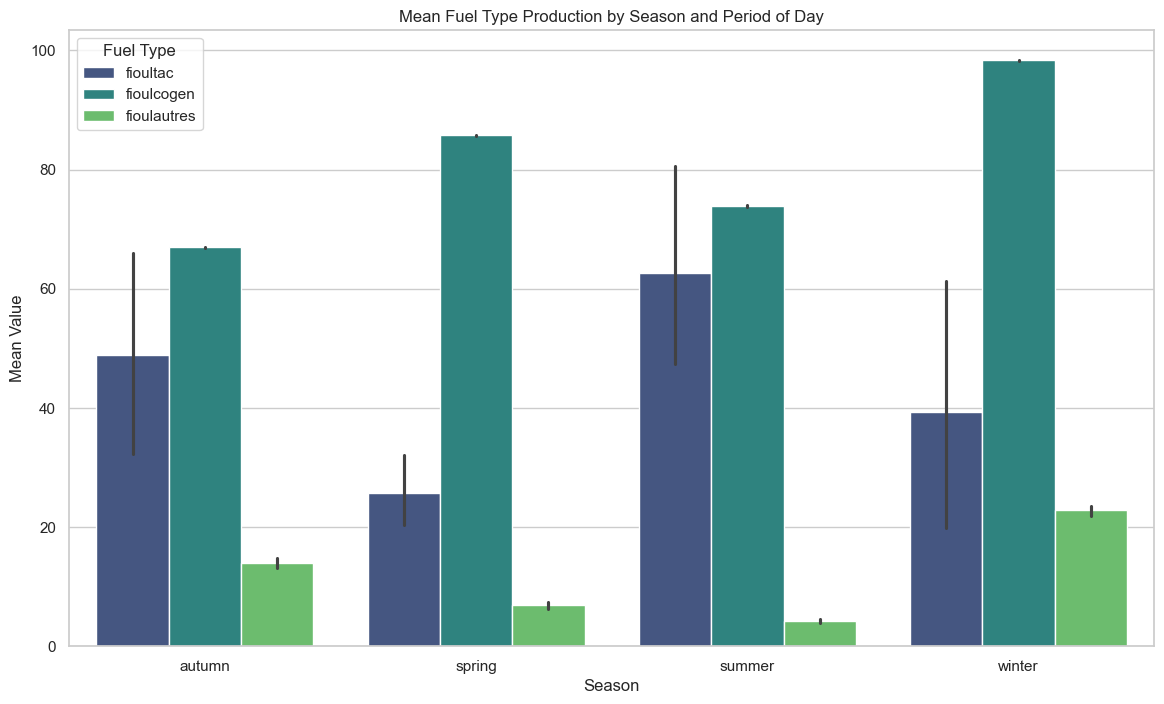

In [131]:
aggregated_df = df_energy_production_sources.groupby(['season', 'period_of_day'])[['fioultac', 'fioulcogen', 'fioulautres']].mean().reset_index()

# Check the aggregated DataFrame
print(aggregated_df.head())

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a function to plot the data
def plot_fuel_type_aggregated_data(aggregated_df, title):
    # Melt the DataFrame to a long format
    melted_df = pd.melt(aggregated_df, id_vars=['season', 'period_of_day'], value_vars=['fioultac', 'fioulcogen', 'fioulautres'],
                        var_name='fuel_type', value_name='mean_value')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y='mean_value', hue='fuel_type', data=melted_df, palette="viridis")
    plt.title(title)
    plt.ylabel('Mean Value')
    plt.xlabel('Season')
    plt.legend(title='Fuel Type')
    plt.show()

# Plot the aggregated data
plot_fuel_type_aggregated_data(aggregated_df, 'Mean Fuel Type Production by Season and Period of Day')

# Trend Analysis

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose

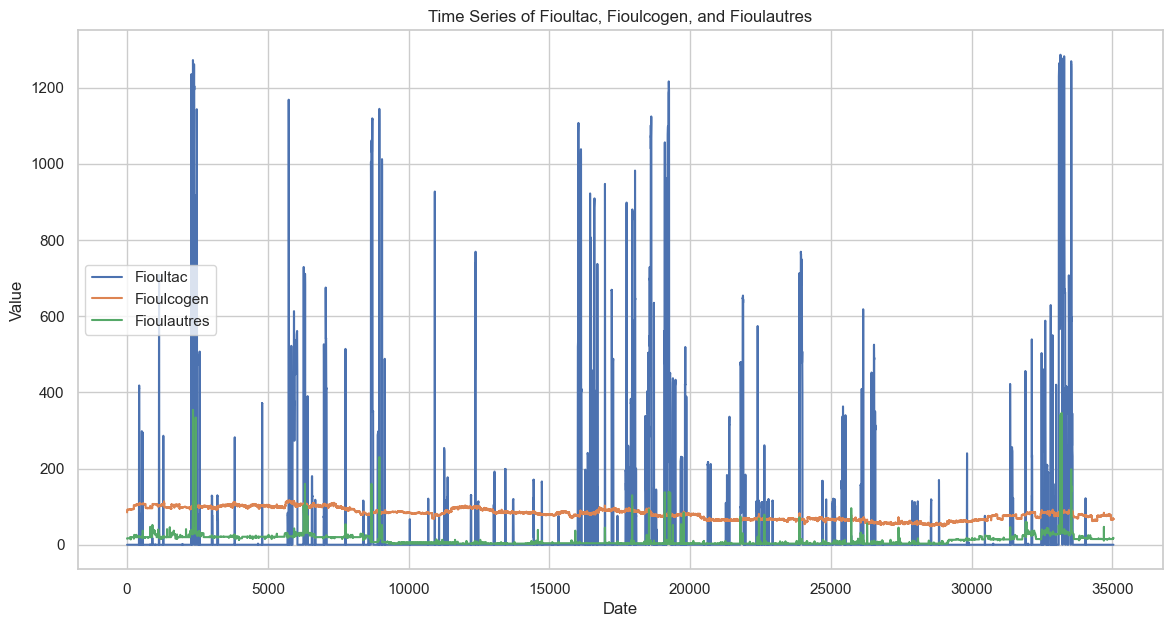

In [133]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources['fioultac'], label='Fioultac')
plt.plot(df_energy_production_sources['fioulcogen'], label='Fioulcogen')
plt.plot(df_energy_production_sources['fioulautres'], label='Fioulautres')
plt.title('Time Series of Fioultac, Fioulcogen, and Fioulautres')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Comparative Analysis

In [135]:
# Select only the specified numeric columns and relevant group columns
numeric_columns = ['fioultac', 'fioulcogen', 'fioulautres']
df_energy_production_sources =df_energy_production_sources[numeric_columns + ['season', 'period_of_day']]

# Calculate the total energy provided by each source over different seasons
seasonal_totals = df_energy_production_sources.groupby('season')[numeric_columns].sum()

# Calculate the total energy provided by each source over different periods of the day
period_totals = df_energy_production_sources.groupby('period_of_day')[numeric_columns].sum()

# Rank the energy sources within each season and period of the day
seasonal_ranks = seasonal_totals.rank(axis=1, ascending=False, method='min')
period_ranks = period_totals.rank(axis=1, ascending=False, method='min')

<Figure size 1400x700 with 0 Axes>

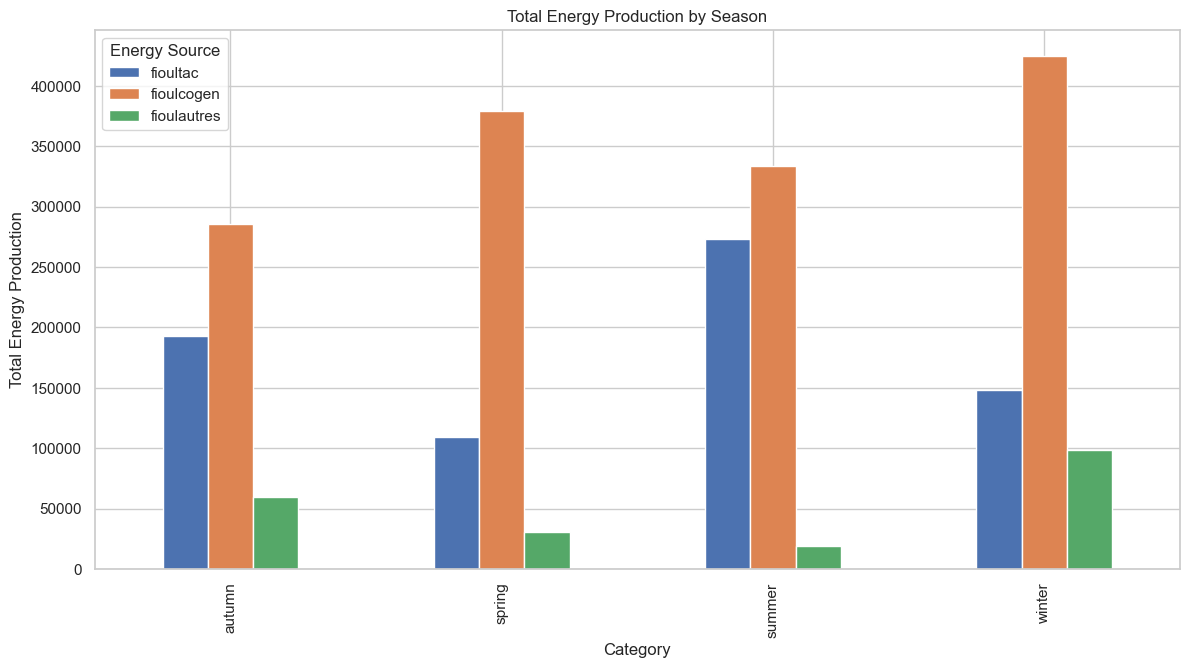

<Figure size 1400x700 with 0 Axes>

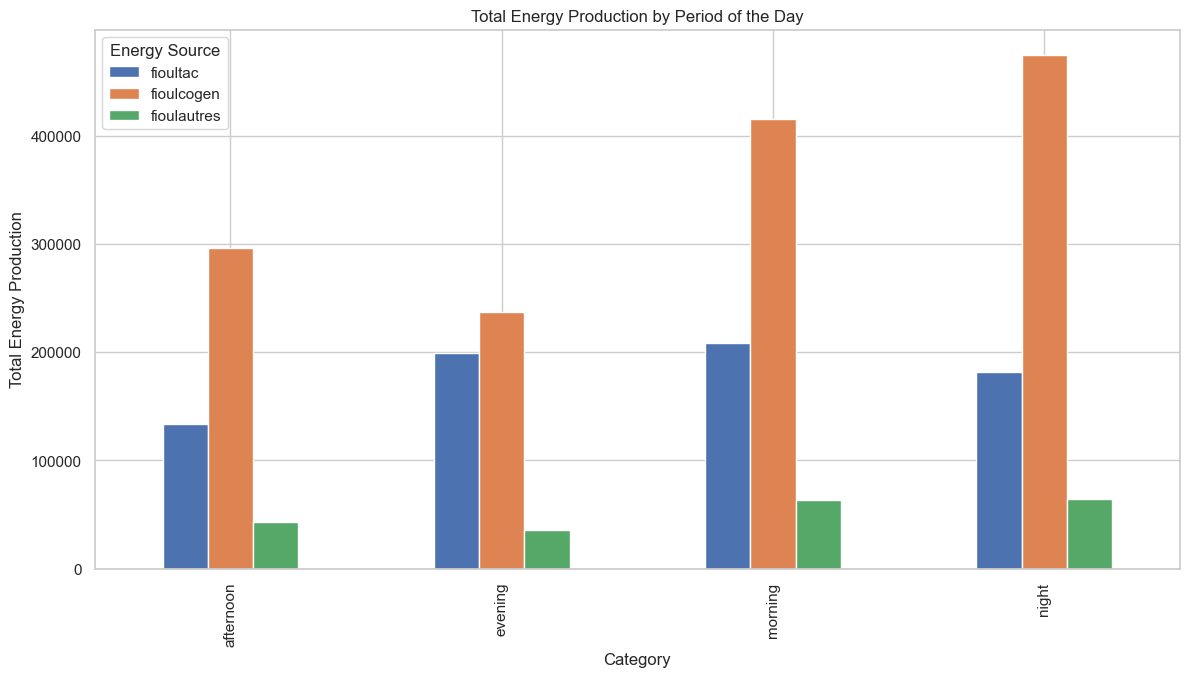

In [136]:
# Function to plot ranking bar charts
def plot_ranking_barchart(df, title):
    plt.figure(figsize=(14, 7))
    df.plot(kind='bar', figsize=(14, 7))
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Total Energy Production')
    plt.legend(title='Energy Source')
    plt.show()

# Plot ranking bar charts for seasons
plot_ranking_barchart(seasonal_totals, 'Total Energy Production by Season')

# Plot ranking bar charts for periods of the day
plot_ranking_barchart(period_totals, 'Total Energy Production by Period of the Day')


# diagontics analytics

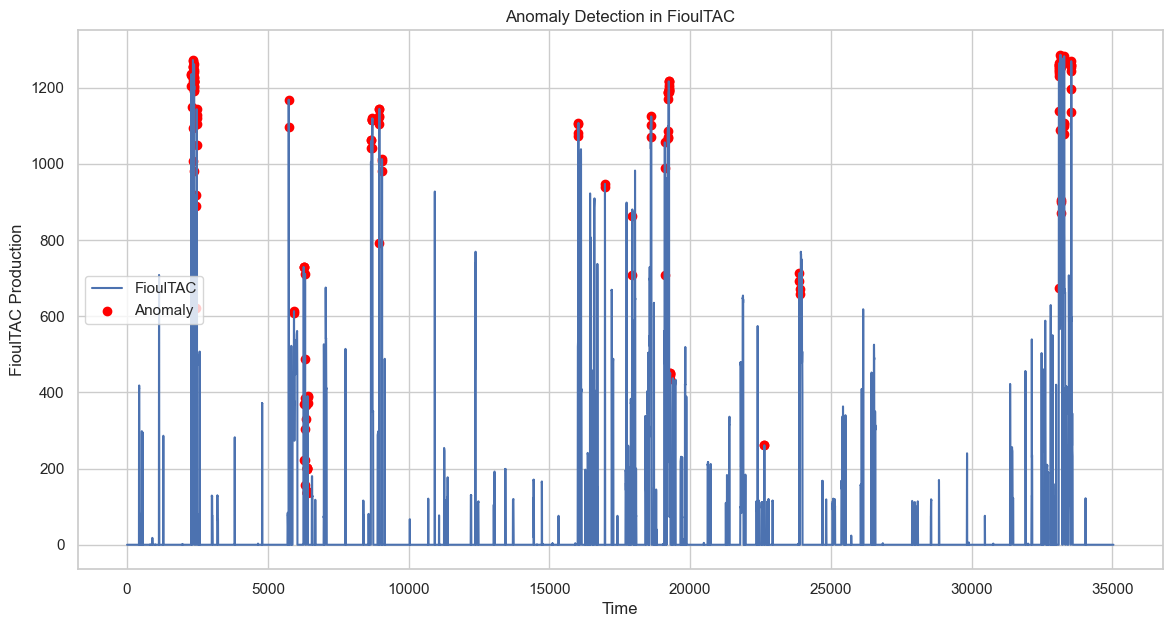

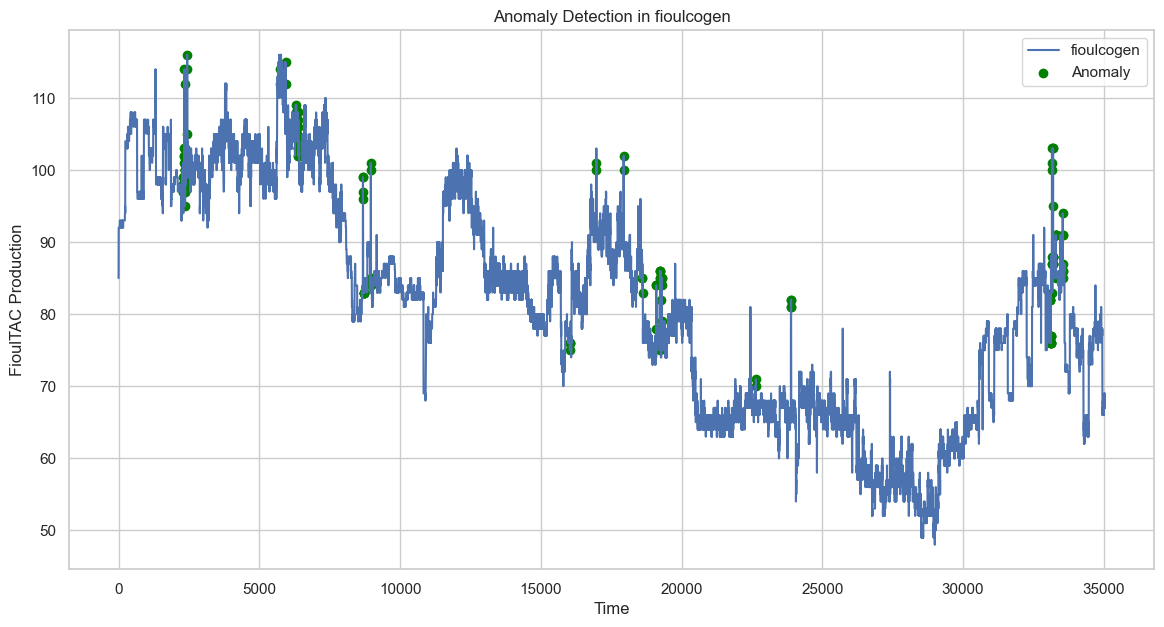

In [137]:

from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
anomalies = iso_forest.fit_predict(df_energy_production_sources[['fioultac', 'fioulcogen', 'fioulautres']])
df_energy_production_sources['anomaly'] = anomalies

# Plot anomalies for fioultac:
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources.index, df_energy_production_sources['fioultac'], label='FioulTAC')
plt.scatter(df_energy_production_sources.index[df_energy_production_sources['anomaly'] == -1], df_energy_production_sources['fioultac'][df_energy_production_sources['anomaly'] == -1], color='red', label='Anomaly')
plt.title('Anomaly Detection in FioulTAC')
plt.xlabel('Time')
plt.ylabel('FioulTAC Production')
plt.legend()
plt.show()

# plot for fioulcogen
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources.index, df_energy_production_sources['fioulcogen'], label='fioulcogen')
plt.scatter(df_energy_production_sources.index[df_energy_production_sources['anomaly'] == -1], df_energy_production_sources['fioulcogen'][df_energy_production_sources['anomaly'] == -1], color='green', label='Anomaly')
plt.title('Anomaly Detection in fioulcogen')
plt.xlabel('Time')
plt.ylabel('FioulTAC Production')
plt.legend()
plt.show()




In [163]:
df_energy_production_sources.columns


Index(['datetime', 'fioultac', 'fioulcogen', 'fioulautres', 'gaztac',
       'gazcogen', 'gazccg', 'gazautres', 'hydrauliquefil', 'hydrauliquelacs',
       'hydrauliquestepturbinage', 'bioenergiesdechets', 'bioenergiesbiomasse',
       'bioenergiesbiogaz', 'stockagbatterie', 'destockagebatterie',
       'eolienterrestre', 'eolienoffshore', 'season', 'period_of_day'],
      dtype='object')

   season period_of_day      gaztac     gazcogen       gazccg    gazautres
0  autumn     afternoon  199.384270  1007.973034  4064.707865  1122.751685
1  autumn       evening  229.251404  1020.845506  4383.407303  1131.345506
2  autumn       morning  165.866774   998.198234  3832.077849  1095.379615
3  autumn         night  126.113764   968.528792  3368.386236  1077.504213
4  spring     afternoon   44.877174   520.490217  2564.725000   594.060870


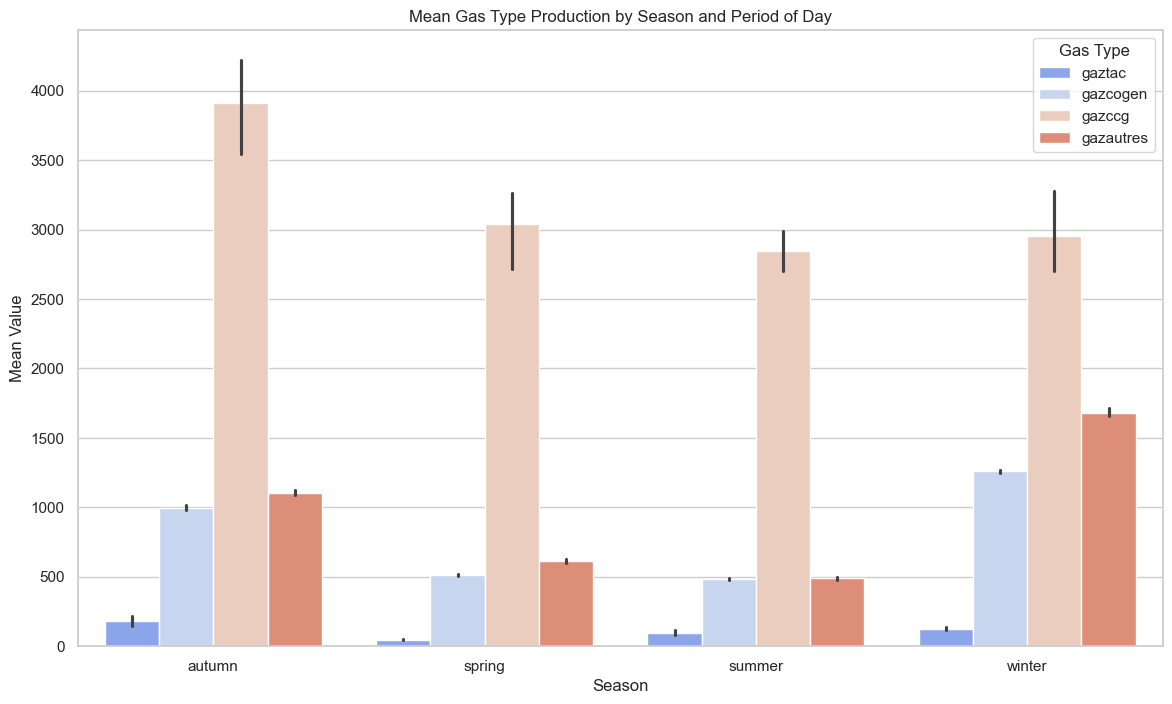

In [164]:
# Aggregate the data by season and period of day
aggregated_df = df_energy_production_sources.groupby(['season', 'period_of_day'])[['gaztac', 'gazcogen', 'gazccg', 'gazautres']].mean().reset_index()

# Check the aggregated DataFrame
print(aggregated_df.head())

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a function to plot the data
def plot_gas_type_aggregated_data(aggregated_df, title):
    # Melt the DataFrame to a long format
    melted_df = pd.melt(aggregated_df, id_vars=['season', 'period_of_day'], value_vars=['gaztac', 'gazcogen', 'gazccg', 'gazautres'],
                        var_name='gas_type', value_name='mean_value')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y='mean_value', hue='gas_type', data=melted_df, palette="coolwarm")
    plt.title(title)
    plt.ylabel('Mean Value')
    plt.xlabel('Season')
    plt.legend(title='Gas Type')
    plt.show()

# Plot the aggregated data
plot_gas_type_aggregated_data(aggregated_df, 'Mean Gas Type Production by Season and Period of Day')

# Trend analytics

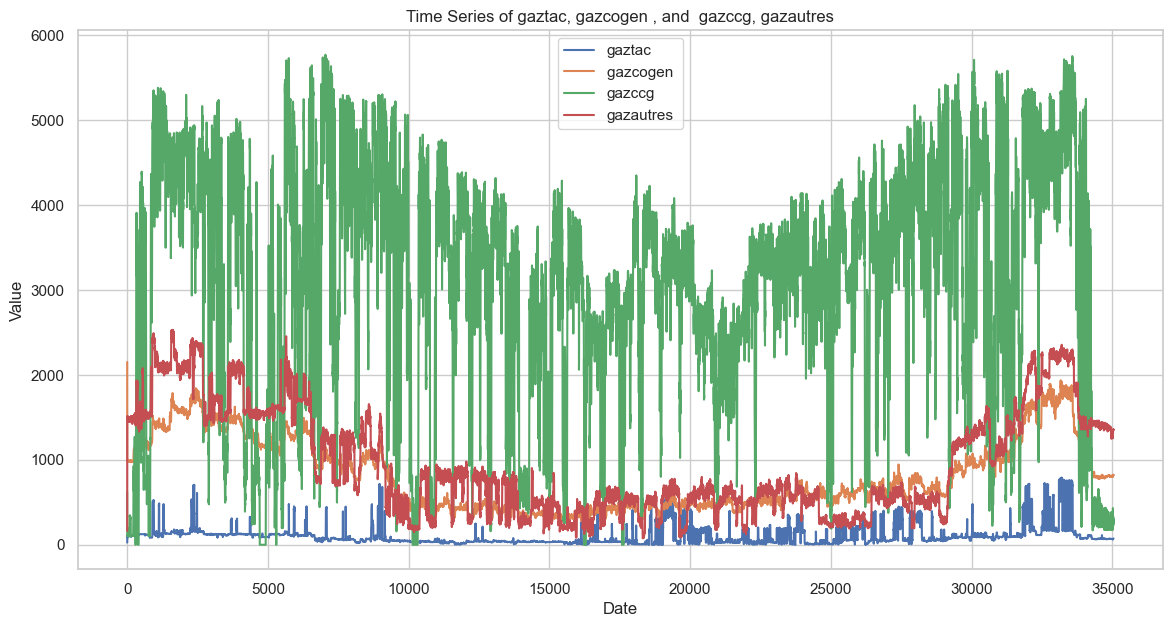

In [165]:
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources['gaztac'], label='gaztac')
plt.plot(df_energy_production_sources['gazcogen'], label='gazcogen ')
plt.plot(df_energy_production_sources['gazccg'], label='gazccg')
plt.plot(df_energy_production_sources['gazautres'], label='gazautres')
plt.title('Time Series of gaztac, gazcogen , and  gazccg, gazautres')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# compartive analytics

In [166]:
# Select only the specified numeric columns and relevant group columns
numeric_columns = ['gaztac', 'gazcogen', 'gazccg','gazautres']
df_energy_production_sources =df_energy_production_sources[numeric_columns + ['season', 'period_of_day']]

# Calculate the total energy provided by each source over different seasons
seasonal_totals = df_energy_production_sources.groupby('season')[numeric_columns].sum()

# Calculate the total energy provided by each source over different periods of the day
period_totals = df_energy_production_sources.groupby('period_of_day')[numeric_columns].sum()

# Rank the energy sources within each season and period of the day
seasonal_ranks = seasonal_totals.rank(axis=1, ascending=False, method='min')
period_ranks = period_totals.rank(axis=1, ascending=False, method='min')

<Figure size 1400x700 with 0 Axes>

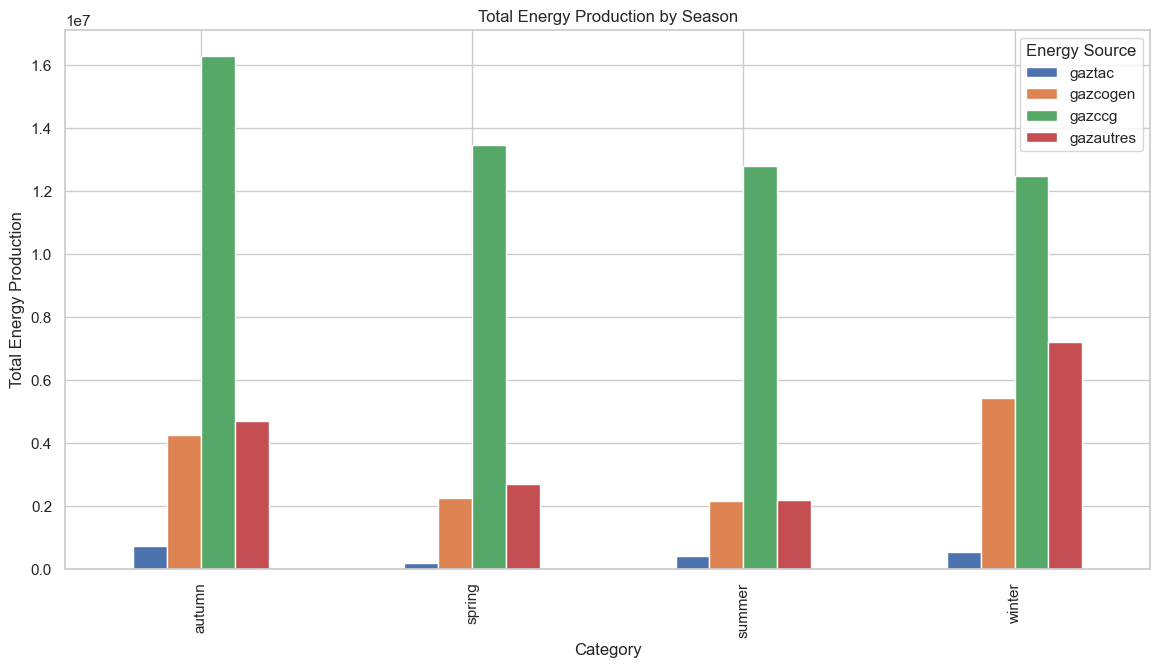

<Figure size 1400x700 with 0 Axes>

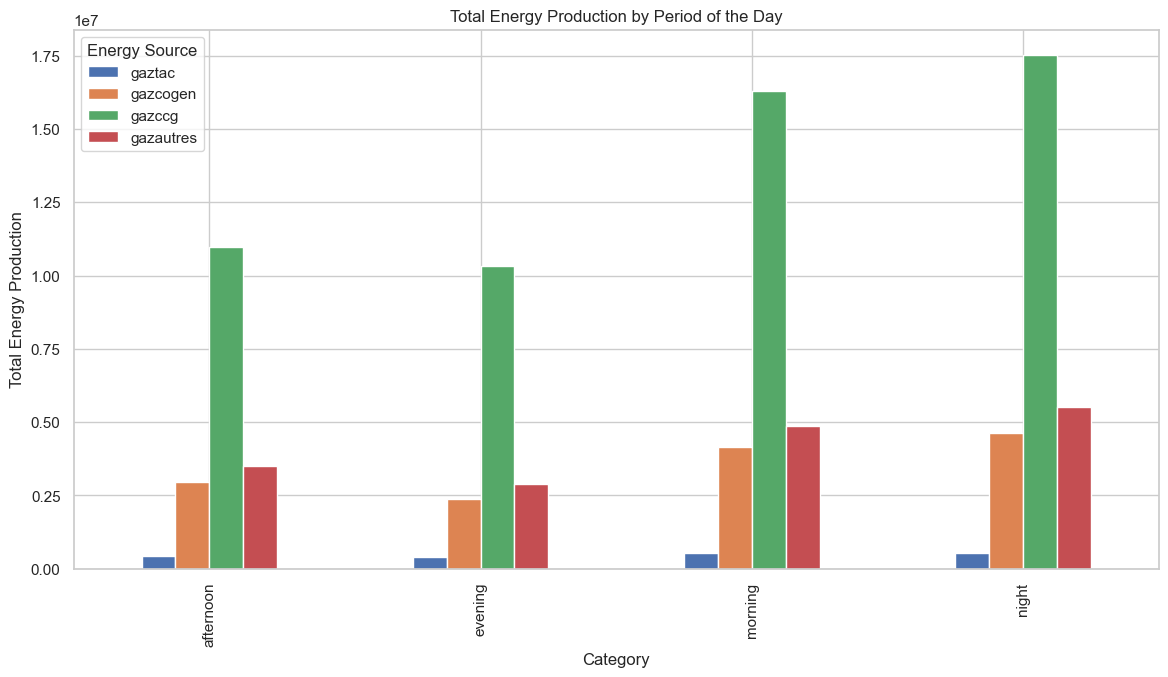

In [167]:
# Function to plot ranking bar charts
def plot_ranking_barchart(df, title):
    plt.figure(figsize=(14, 7))
    df.plot(kind='bar', figsize=(14, 7))
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Total Energy Production')
    plt.legend(title='Energy Source')
    plt.show()

# Plot ranking bar charts for seasons
plot_ranking_barchart(seasonal_totals, 'Total Energy Production by Season')

# Plot ranking bar charts for periods of the day
plot_ranking_barchart(period_totals, 'Total Energy Production by Period of the Day')

# diagnostic analytics

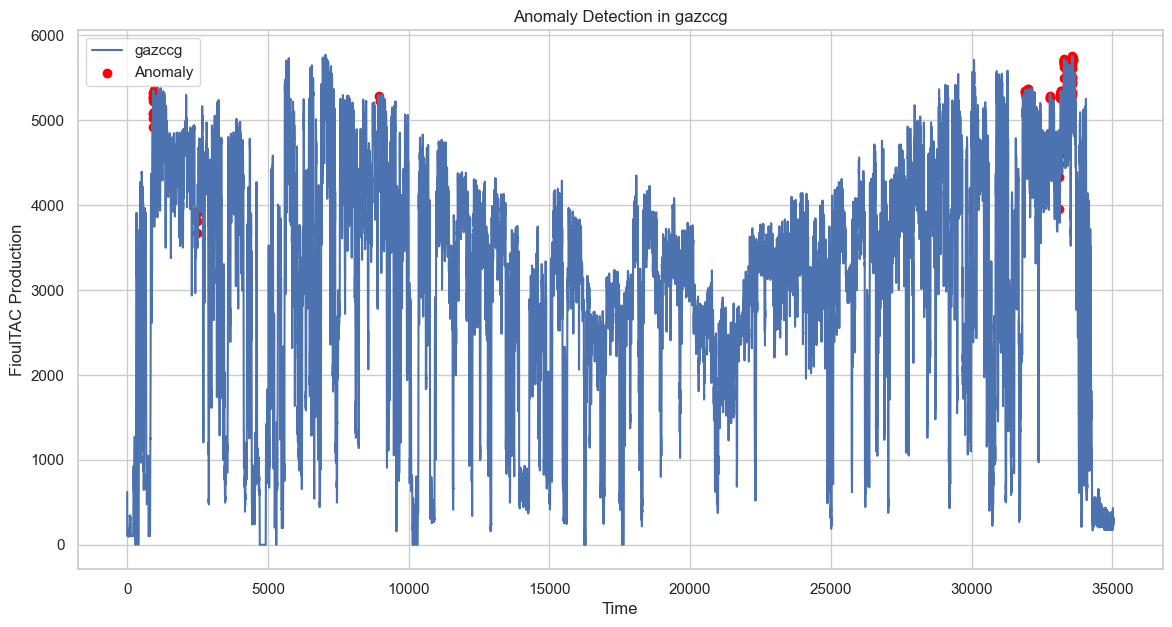

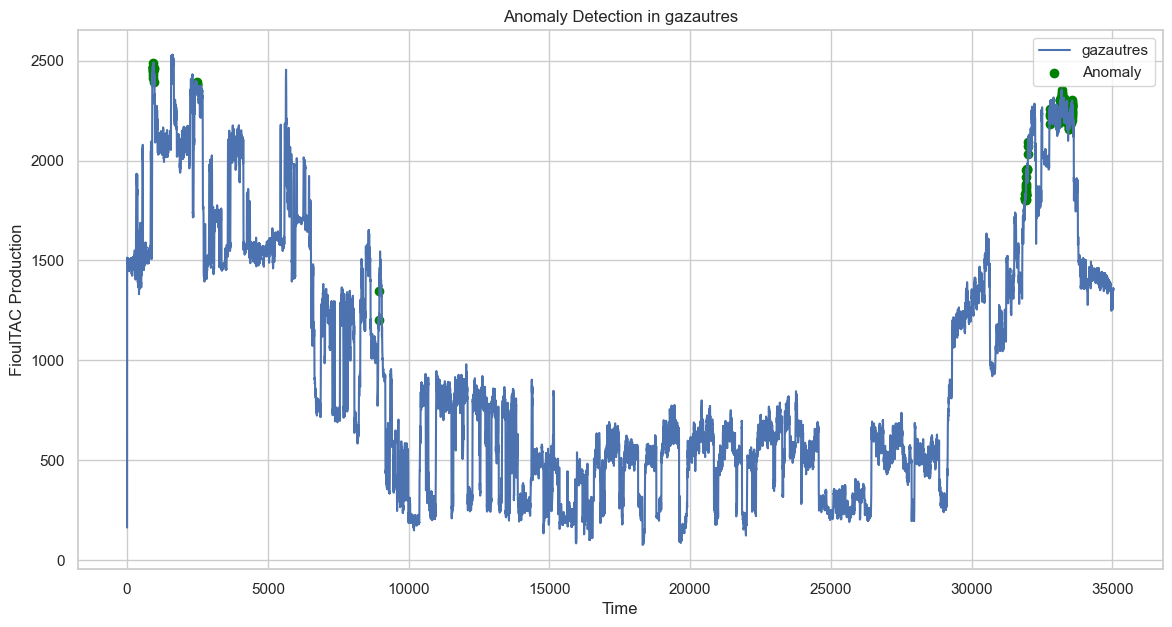

In [170]:

from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
anomalies = iso_forest.fit_predict(df_energy_production_sources[ ['gaztac', 'gazcogen', 'gazccg','gazautres']])
df_energy_production_sources['anomaly'] = anomalies

# Plot anomalies for fioultac:
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources.index, df_energy_production_sources['gazccg'], label='gazccg')
plt.scatter(df_energy_production_sources.index[df_energy_production_sources['anomaly'] == -1], df_energy_production_sources['gazccg'][df_energy_production_sources['anomaly'] == -1], color='red', label='Anomaly')
plt.title('Anomaly Detection in gazccg')
plt.xlabel('Time')
plt.ylabel('FioulTAC Production')
plt.legend()
plt.show()

# plot for gazautres
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources.index, df_energy_production_sources['gazautres'], label='gazautres')
plt.scatter(df_energy_production_sources.index[df_energy_production_sources['anomaly'] == -1], df_energy_production_sources['gazautres'][df_energy_production_sources['anomaly'] == -1], color='green', label='Anomaly')
plt.title('Anomaly Detection in gazautres')
plt.xlabel('Time')
plt.ylabel('FioulTAC Production')
plt.legend()
plt.show()

# 3.Hydraulic Energy Sources

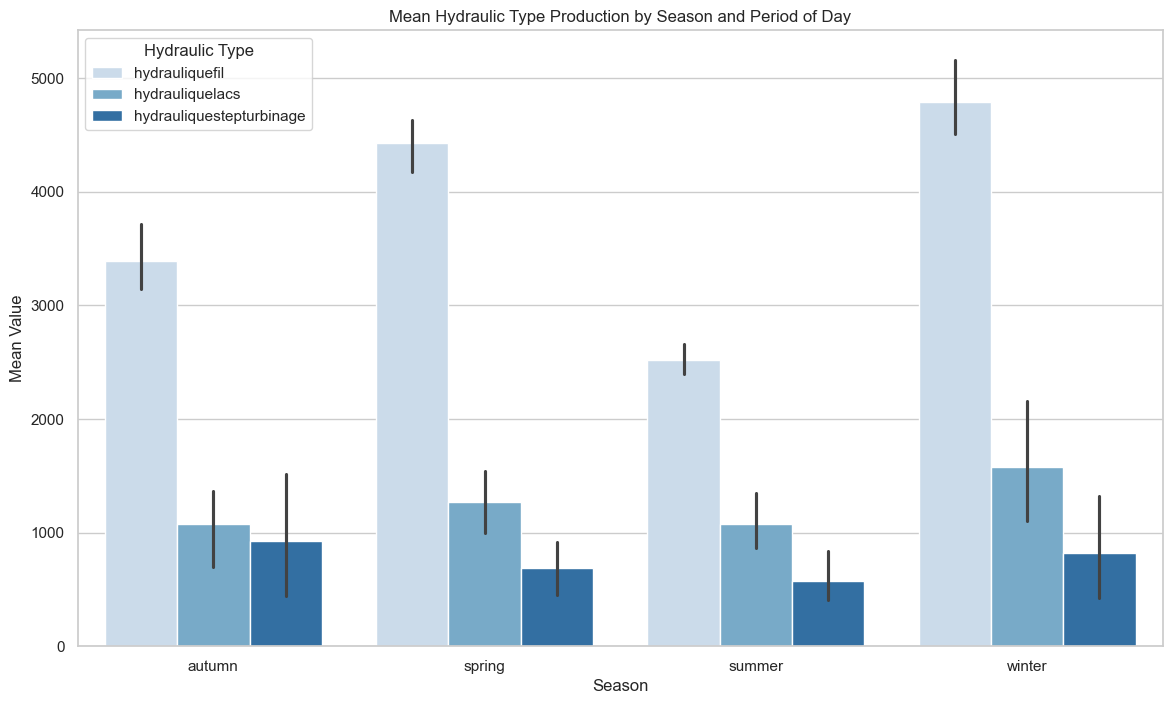

In [189]:
aggregated_hydraulic_df = df_energy_production_sources.groupby(['season', 'period_of_day'])[['hydrauliquefil', 'hydrauliquelacs', 'hydrauliquestepturbinage']].mean().reset_index()
# Create a function to plot the data for Hydraulic Energy Sources
def plot_hydraulic_type_aggregated_data(aggregated_df, title):
    # Melt the DataFrame to a long format
    melted_df = pd.melt(aggregated_df, id_vars=['season', 'period_of_day'], value_vars=['hydrauliquefil', 'hydrauliquelacs', 'hydrauliquestepturbinage'],
                        var_name='hydraulic_type', value_name='mean_value')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y='mean_value', hue='hydraulic_type', data=melted_df, palette="Blues")
    plt.title(title)
    plt.ylabel('Mean Value')
    plt.xlabel('Season')
    plt.legend(title='Hydraulic Type')
    plt.show()

# Plot the aggregated data for Hydraulic Energy Sources
plot_hydraulic_type_aggregated_data(aggregated_hydraulic_df, 'Mean Hydraulic Type Production by Season and Period of Day')


# time-series 

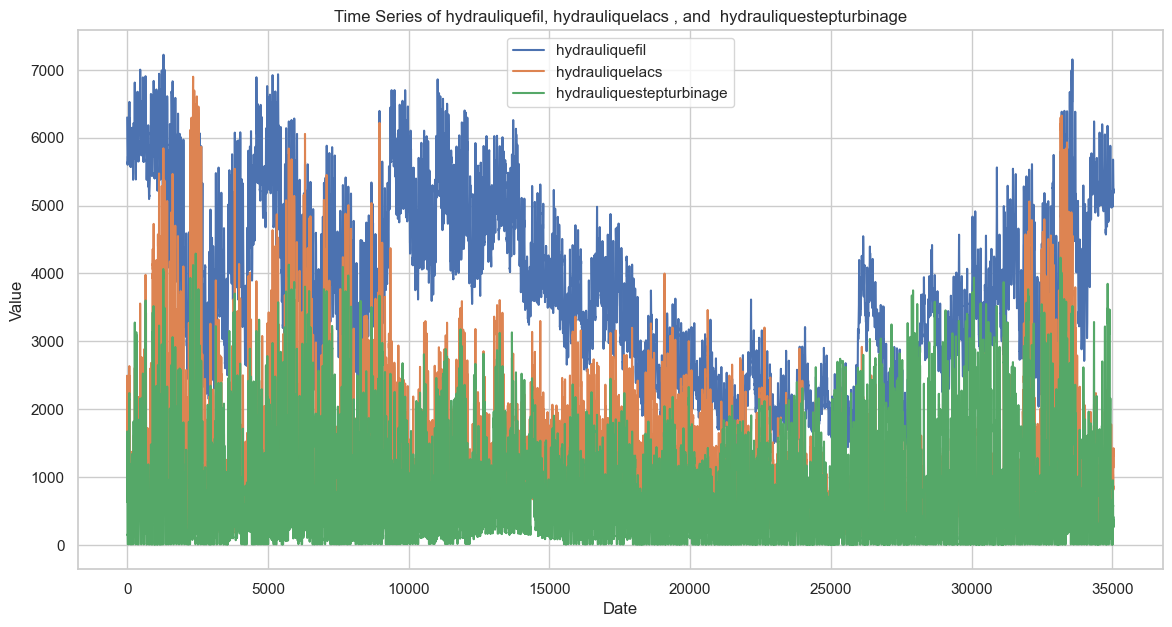

In [190]:
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources['hydrauliquefil'], label='hydrauliquefil')
plt.plot(df_energy_production_sources['hydrauliquelacs'], label='hydrauliquelacs')
plt.plot(df_energy_production_sources['hydrauliquestepturbinage'], label='hydrauliquestepturbinage')
plt.title('Time Series of hydrauliquefil, hydrauliquelacs , and  hydrauliquestepturbinage')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# total hydrolic energy over season and periode 

In [191]:

numeric_columns = ['hydrauliquefil', 'hydrauliquelacs', 'hydrauliquestepturbinage']
df_energy_production_sources =df_energy_production_sources[numeric_columns + ['season', 'period_of_day']]

# Calculate the total energy provided by each source over different seasons
seasonal_totals = df_energy_production_sources.groupby('season')[numeric_columns].sum()

# Calculate the total energy provided by each source over different periods of the day
period_totals = df_energy_production_sources.groupby('period_of_day')[numeric_columns].sum()

# Rank the energy sources within each season and period of the day
seasonal_ranks = seasonal_totals.rank(axis=1, ascending=False, method='min')
period_ranks = period_totals.rank(axis=1, ascending=False, method='min')

<Figure size 1400x700 with 0 Axes>

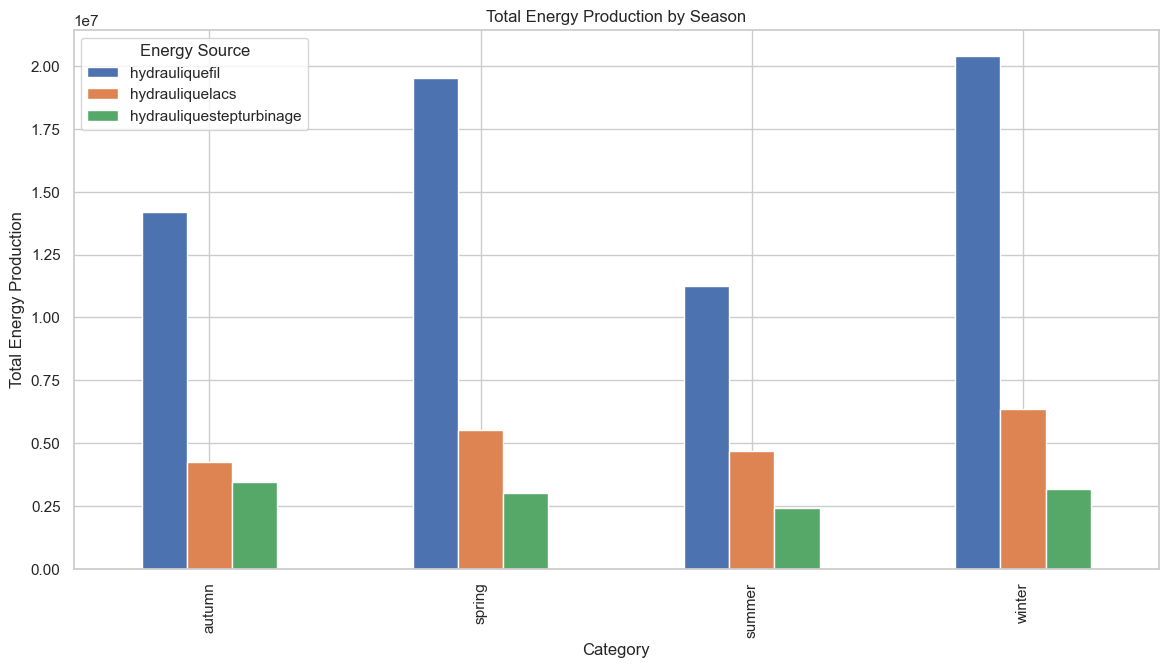

<Figure size 1400x700 with 0 Axes>

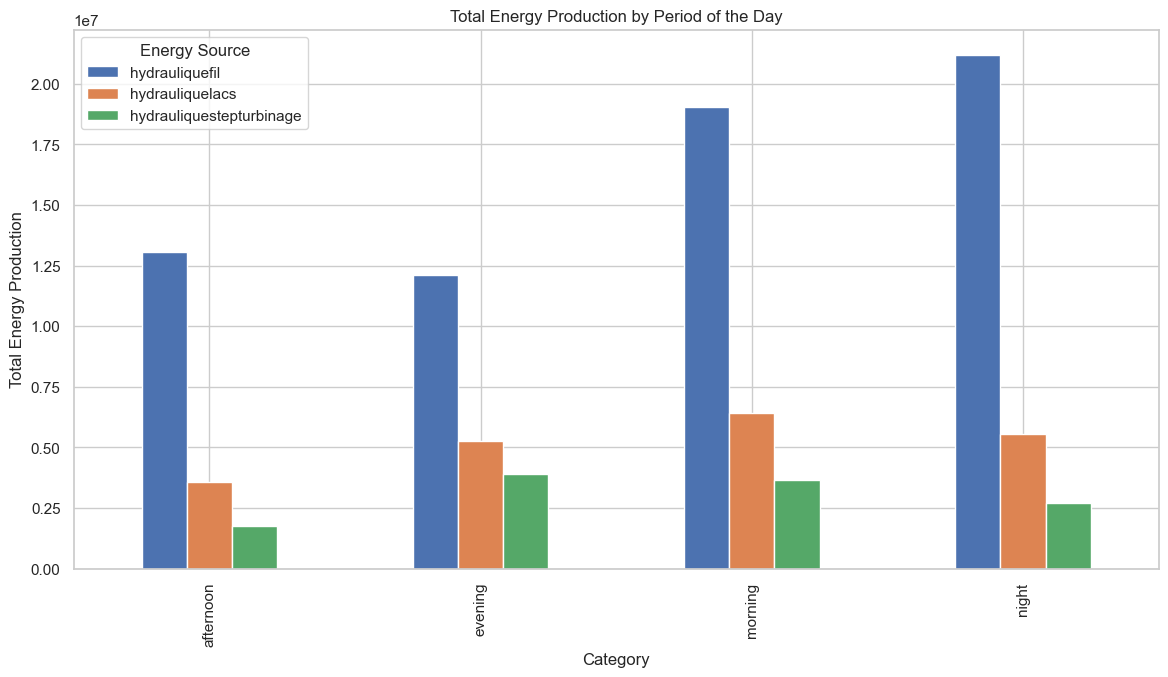

In [192]:
# Function to plot ranking bar charts
def plot_ranking_barchart(df, title):
    plt.figure(figsize=(14, 7))
    df.plot(kind='bar', figsize=(14, 7))
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Total Energy Production')
    plt.legend(title='Energy Source')
    plt.show()

# Plot ranking bar charts for seasons
plot_ranking_barchart(seasonal_totals, 'Total Energy Production by Season')

# Plot ranking bar charts for periods of the day
plot_ranking_barchart(period_totals, 'Total Energy Production by Period of the Day')

# diadnostic analytics

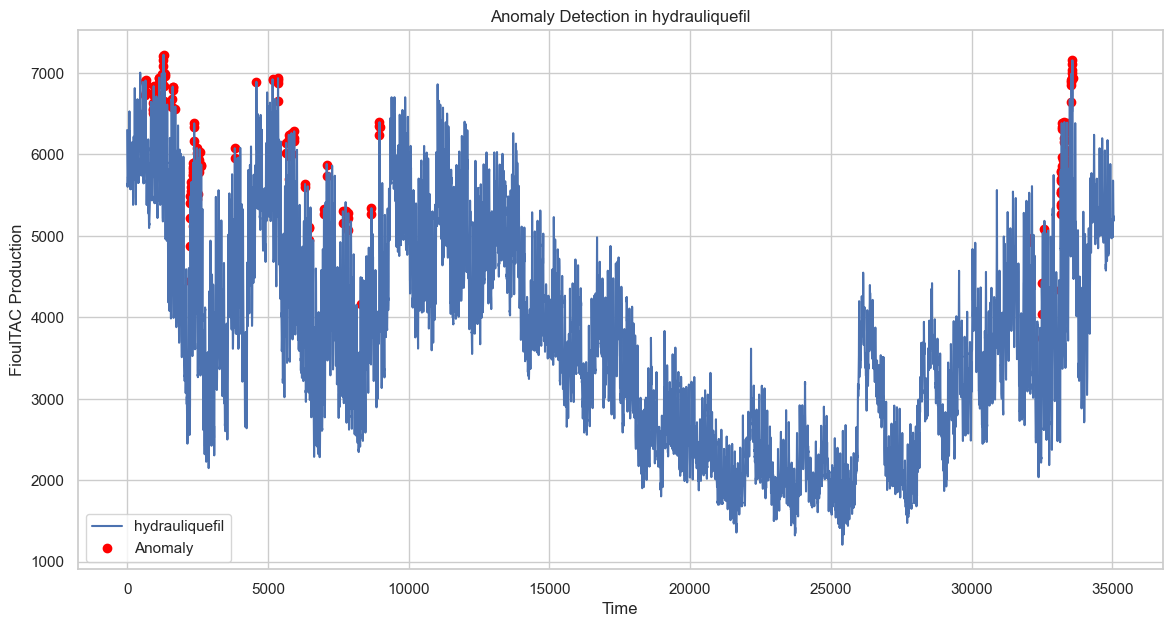

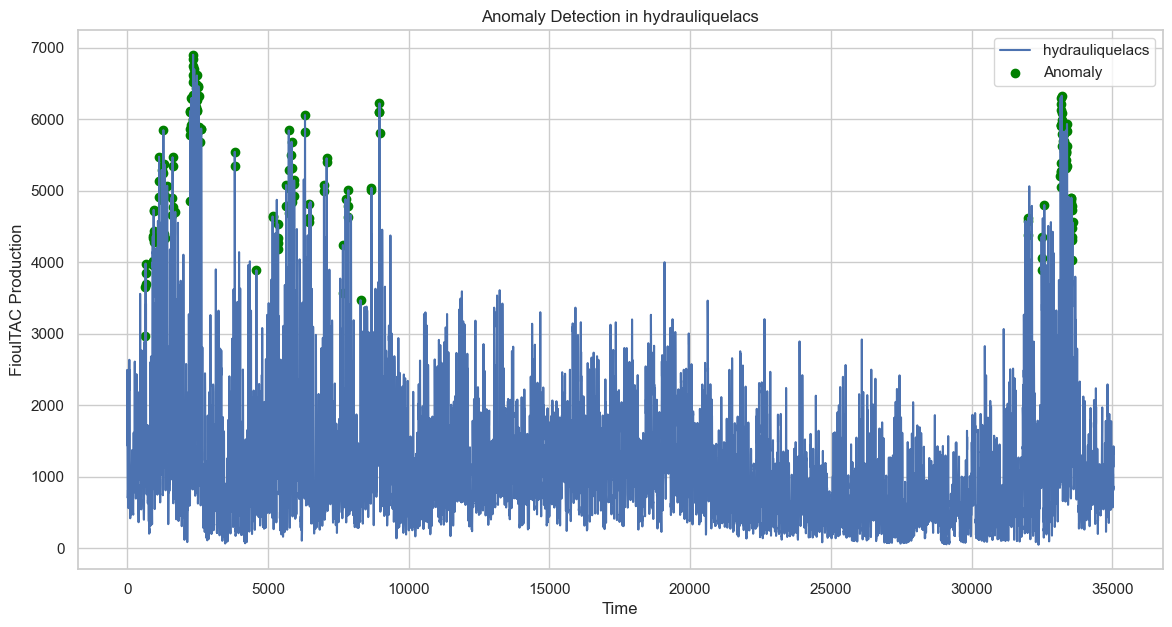

In [193]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
anomalies = iso_forest.fit_predict(df_energy_production_sources[ ['hydrauliquefil', 'hydrauliquelacs', 'hydrauliquestepturbinage']])
df_energy_production_sources['anomaly'] = anomalies

# Plot anomalies for fioultac:
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources.index, df_energy_production_sources['hydrauliquefil'], label='hydrauliquefil')
plt.scatter(df_energy_production_sources.index[df_energy_production_sources['anomaly'] == -1], df_energy_production_sources['hydrauliquefil'][df_energy_production_sources['anomaly'] == -1], color='red', label='Anomaly')
plt.title('Anomaly Detection in hydrauliquefil')
plt.xlabel('Time')
plt.ylabel('FioulTAC Production')
plt.legend()
plt.show()

# plot for gazautres
plt.figure(figsize=(14, 7))
plt.plot(df_energy_production_sources.index, df_energy_production_sources['hydrauliquelacs'], label='hydrauliquelacs')
plt.scatter(df_energy_production_sources.index[df_energy_production_sources['anomaly'] == -1], df_energy_production_sources['hydrauliquelacs'][df_energy_production_sources['anomaly'] == -1], color='green', label='Anomaly')
plt.title('Anomaly Detection in hydrauliquelacs')
plt.xlabel('Time')
plt.ylabel('FioulTAC Production')
plt.legend()
plt.show()

# 4.Bioenergy Sources

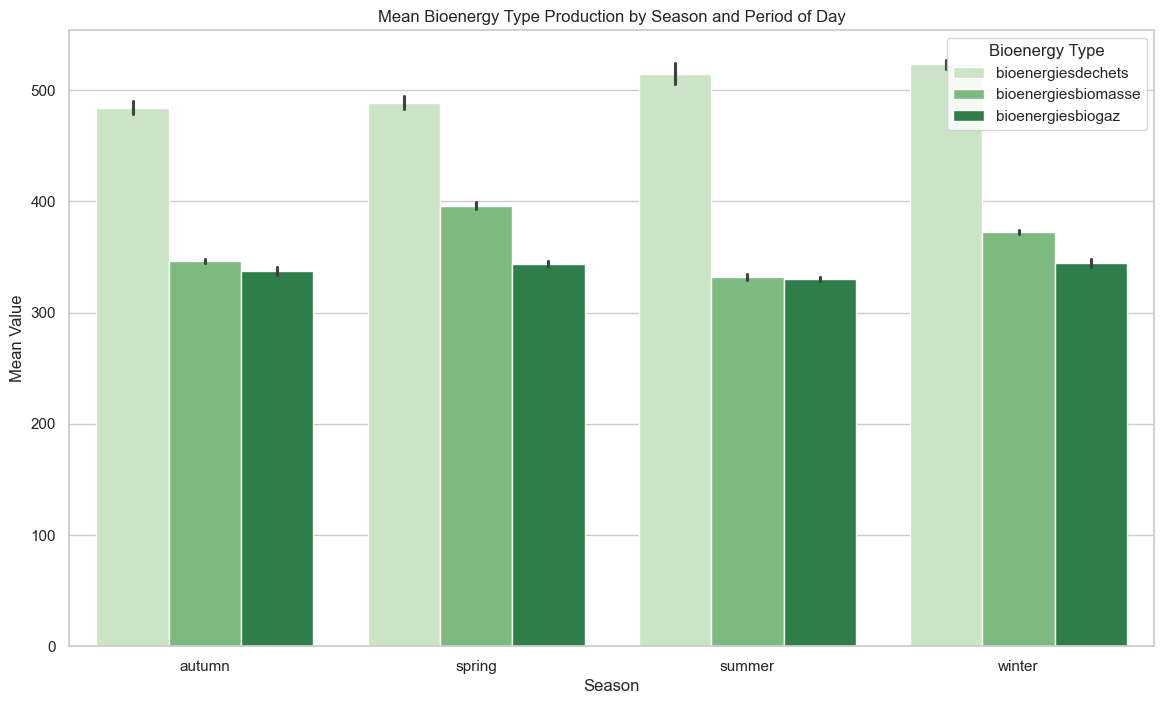

In [ ]:
aggregated_bioenergy_df = df_energy_production_sources.groupby(['season', 'period_of_day'])[['bioenergiesdechets', 'bioenergiesbiomasse', 'bioenergiesbiogaz']].mean().reset_index()
# Create a function to plot the data for Bioenergy Sources
def plot_bioenergy_type_aggregated_data(aggregated_df, title):
    # Melt the DataFrame to a long format
    melted_df = pd.melt(aggregated_df, id_vars=['season', 'period_of_day'], value_vars=['bioenergiesdechets', 'bioenergiesbiomasse', 'bioenergiesbiogaz'],
                        var_name='bioenergy_type', value_name='mean_value')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y='mean_value', hue='bioenergy_type', data=melted_df, palette="Greens")
    plt.title(title)
    plt.ylabel('Mean Value')
    plt.xlabel('Season')
    plt.legend(title='Bioenergy Type')
    plt.show()

# Plot the aggregated data for Bioenergy Sources
plot_bioenergy_type_aggregated_data(aggregated_bioenergy_df, 'Mean Bioenergy Type Production by Season and Period of Day')